In [1]:
import os 
import requests
from bs4 import BeautifulSoup
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import scipy.stats as stats

In [2]:
# read in data from csv
all_slc_counties_2023 = pd.read_csv("aqs-all-slc-counties-2023.csv")

In [3]:
all_slc_counties_2023.columns

Index(['Unnamed: 0', 'state_code', 'county_code', 'site_number',
       'parameter_code', 'poc', 'latitude', 'longitude', 'datum', 'parameter',
       'date_local', 'time_local', 'date_gmt', 'time_gmt',
       'sample_measurement', 'units_of_measure', 'units_of_measure_code',
       'sample_duration', 'sample_duration_code', 'sample_frequency',
       'detection_limit', 'uncertainty', 'qualifier', 'method_type', 'method',
       'method_code', 'state', 'county', 'date_of_last_change', 'cbsa_code'],
      dtype='object')

In [4]:
all_slc_counties_2023.head()

,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,...,detection_limit,uncertainty,qualifier,method_type,method,method_code,state,county,date_of_last_change,cbsa_code
0,0,49,3,5,88101,1,41.48993,-112.021435,WGS84,PM2.5 - Local Conditions,...,2.0,NaN,NaN,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,145,Utah,Box Elder,2024-01-17,36260
1,1,49,3,5,88101,1,41.48993,-112.021435,WGS84,PM2.5 - Local Conditions,...,2.0,NaN,NaN,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,145,Utah,Box Elder,2024-01-17,36260
2,2,49,3,5,88101,1,41.48993,-112.021435,WGS84,PM2.5 - Local Conditions,...,2.0,NaN,NaN,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,145,Utah,Box Elder,2024-01-17,36260
3,3,49,3,5,88101,1,41.48993,-112.021435,WGS84,PM2.5 - Local Conditions,...,2.0,NaN,NaN,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,145,Utah,Box Elder,2024-01-17,36260
4,4,49,3,5,88101,1,41.48993,-112.021435,WGS84,PM2.5 - Local Conditions,...,2.0,NaN,NaN,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,145,Utah,Box Elder,2024-01-17,36260


In [5]:
all_slc_counties_2023.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,153834.0,76916.500000,44408.194993,0.000000,38458.250000,76916.500000,115374.750000,153833.000000
state_code,153834.0,49.000000,0.000000,49.000000,49.000000,49.000000,49.000000,49.000000
county_code,153834.0,33.539205,14.067293,3.000000,35.000000,35.000000,35.000000,57.000000
site_number,153834.0,2353.097709,1540.143263,4.000000,1003.000000,3010.000000,3015.000000,5010.000000
parameter_code,153834.0,88101.000000,0.000000,88101.000000,88101.000000,88101.000000,88101.000000,88101.000000
poc,153834.0,3.002314,1.324961,1.000000,2.000000,3.000000,4.000000,5.000000
latitude,153834.0,40.812762,0.448387,40.136378,40.598056,40.736389,40.807897,41.842649
longitude,153834.0,-111.933769,0.150085,-112.355780,-112.008760,-111.901851,-111.872222,-111.657936
sample_measurement,152602.0,7.359070,7.329154,-5.700000,3.300000,5.500000,8.600000,130.700000
units_of_measure_code,153834.0,105.000000,0.000000,105.000000,105.000000,105.000000,105.000000,105.000000


In [6]:
all_slc_counties_2023.nunique()

Unnamed: 0               153834
state_code                    1
county_code                   7
site_number                  14
parameter_code                1
poc                           5
latitude                     15
longitude                    15
datum                         2
parameter                     1
date_local                  365
time_local                   24
date_gmt                    366
time_gmt                     24
sample_measurement          786
units_of_measure              1
units_of_measure_code         1
sample_duration               2
sample_duration_code          2
sample_frequency              4
detection_limit               1
uncertainty                   0
qualifier                    28
method_type                   2
method                        2
method_code                   2
state                         1
county                        7
date_of_last_change          83
cbsa_code                     4
dtype: int64

In [7]:
for column in all_slc_counties_2023.columns[2:]:
    value_counts = all_slc_counties_2023[column].value_counts()
    print(f'Column: {column}\n{value_counts}\n')

Column: county_code
35    89766
49    18310
5     18250
11     9125
57     9101
45     9101
3       181
Name: county_code, dtype: int64

Column: site_number
7       18250
4       18226
3006    17885
3013    17520
3010     9490
4001     9185
4002     9125
3015     9125
2005     9125
5010     9125
1003     9101
3014     8760
3016     8736
5         181
Name: site_number, dtype: int64

Column: parameter_code
88101    153834
Name: parameter_code, dtype: int64

Column: poc
3    52877
1    30087
5    26280
4    26280
2    18310
Name: poc, dtype: int64

Column: latitude
41.842649    18250
40.736389    17885
40.496392    17520
40.784220     9490
40.341389     9185
40.902967     9125
40.662961     9125
40.777145     9125
40.598056     9125
40.136378     9125
41.303614     9101
40.600550     9101
40.709762     8760
40.807897     8736
41.489930      181
Name: latitude, dtype: int64

Column: longitude
-111.852199    18250
-111.872222    17885
-112.036298    17520
-111.931000     9490
-111.713611  

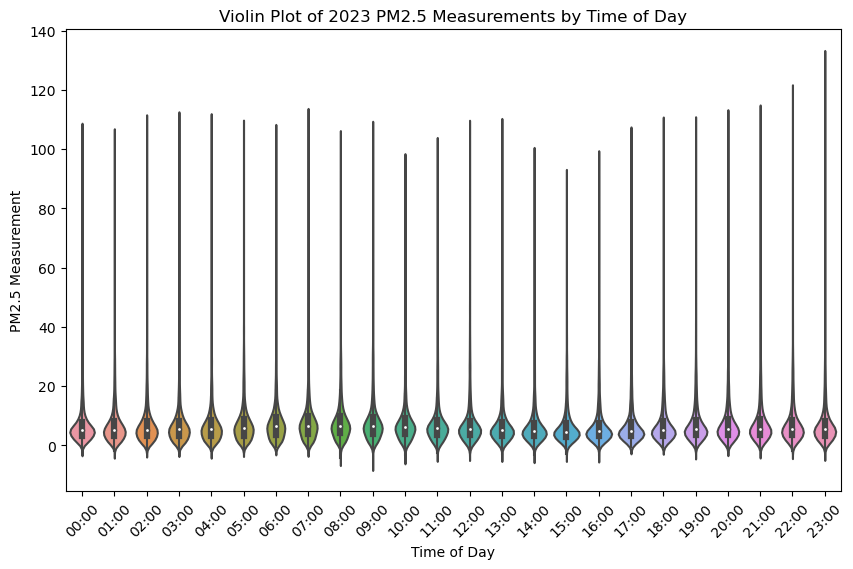

In [8]:
# Order by time
order = all_slc_counties_2023['time_local'].unique()
order.sort()  # Sort the unique categories

plt.figure(figsize=(10, 6))
sns.violinplot(x='time_local', y='sample_measurement', data=all_slc_counties_2023, order = order)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.xlabel('Time of Day')
plt.ylabel('PM2.5 Measurement')
plt.title('Violin Plot of 2023 PM2.5 Measurements by Time of Day')

plt.show()

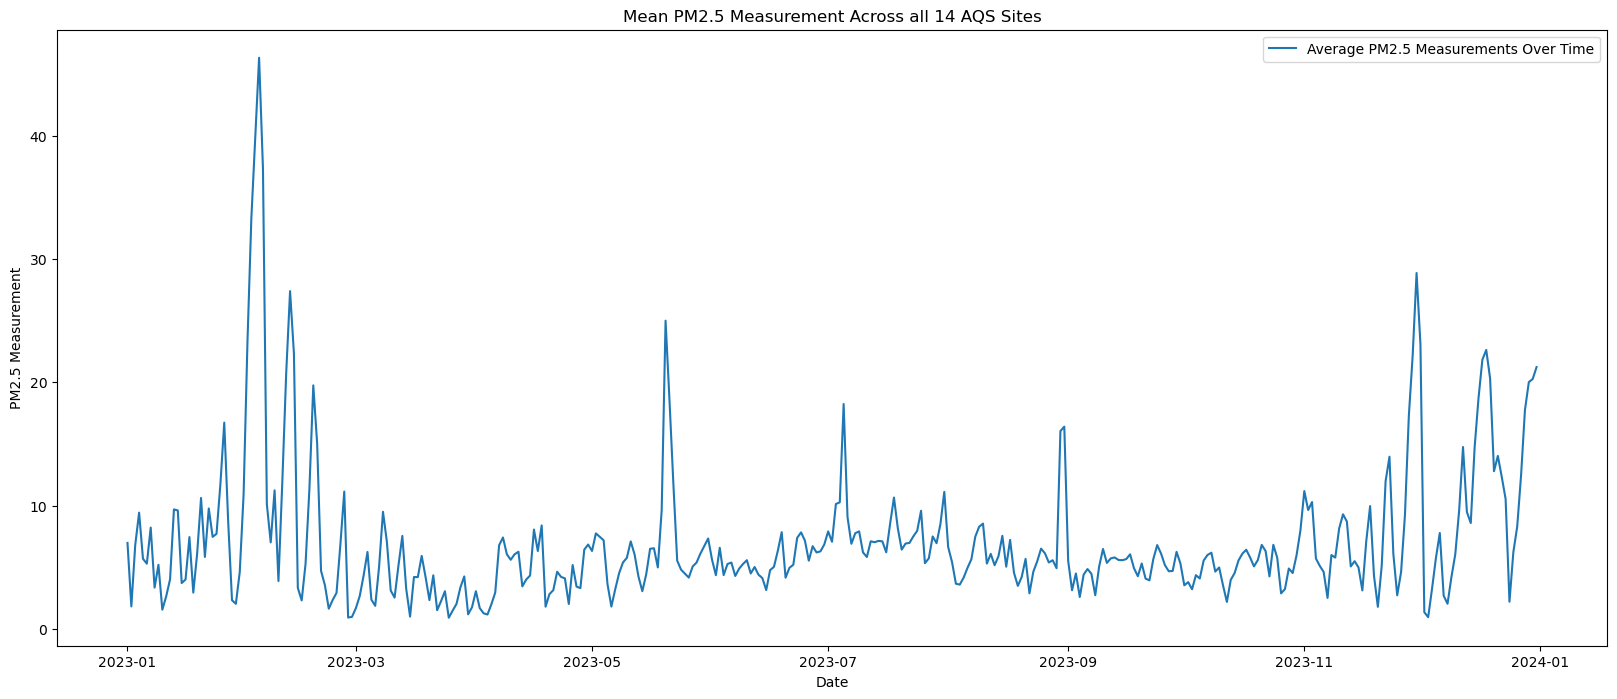

In [31]:
# convert to datetime format
all_slc_counties_2023['date_local'] = pd.to_datetime(all_slc_counties_2023['date_local'])

# subset the dataframe for noon readings
all_slc_counties_2023_noon = all_slc_counties_2023[all_slc_counties_2023['time_local'] == "00:00"]

# aggregate data by taking the mean sample measurement for each date
all_sensor_noon_avg = all_slc_counties_2023_noon.groupby('date_local')['sample_measurement'].mean().reset_index()

# Plot aggregated data
plt.figure(figsize=(20, 8))
plt.plot(all_sensor_noon_avg['date_local'], all_sensor_noon_avg['sample_measurement'], label='Average PM2.5 Measurements Over Time')

plt.xlabel('Date')
plt.ylabel('PM2.5 Measurement')
plt.title('Mean PM2.5 Measurement Across all 14 AQS Sites')
plt.legend()
plt.show()


# Do the same for PM10

In [26]:
all_slc_counties_2023_pm10 = pd.read_csv("aqs-all-slc-counties-2023-pm10.csv")

In [35]:
all_slc_counties_2023_pm10.nunique()

Unnamed: 0               1825
state_code                  1
county_code                 3
site_number                 5
parameter_code              1
poc                         2
latitude                    5
longitude                   5
datum                       2
parameter                   1
date_local                365
time_local                  1
date_gmt                  365
time_gmt                    1
sample_measurement         67
units_of_measure            1
units_of_measure_code       1
sample_duration             1
sample_duration_code        1
sample_frequency            1
detection_limit             1
uncertainty                 0
qualifier                   6
method_type                 1
method                      1
method_code                 1
state                       1
county                      3
date_of_last_change        19
cbsa_code                   3
dtype: int64

In [40]:
print(f"PM2.5 Sensors: {all_slc_counties_2023['site_number'].unique()}")
print(f"PM10.0 Sensors: {all_slc_counties_2023_pm10['site_number'].unique()}")

PM2.5 Sensors: [   5    7 1003    4 3010 3014 3006 4002 3013 3016 3015 2005 4001 5010]
PM10.0 Sensors: [1003 3013 3006 3015 4001]


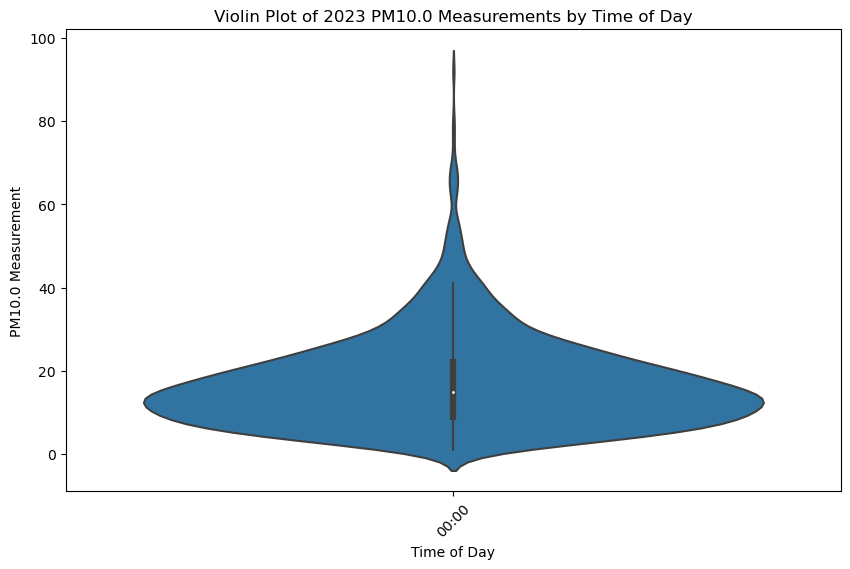

In [30]:
# Order by time
order = all_slc_counties_2023_pm10['time_local'].unique()
order.sort()  # Sort the unique categories

plt.figure(figsize=(10, 6))
sns.violinplot(x='time_local', y='sample_measurement', data=all_slc_counties_2023_pm10, order = order)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.xlabel('Time of Day')
plt.ylabel('PM10.0 Measurement')
plt.title('Violin Plot of 2023 PM10.0 Measurements by Time of Day')

plt.show()

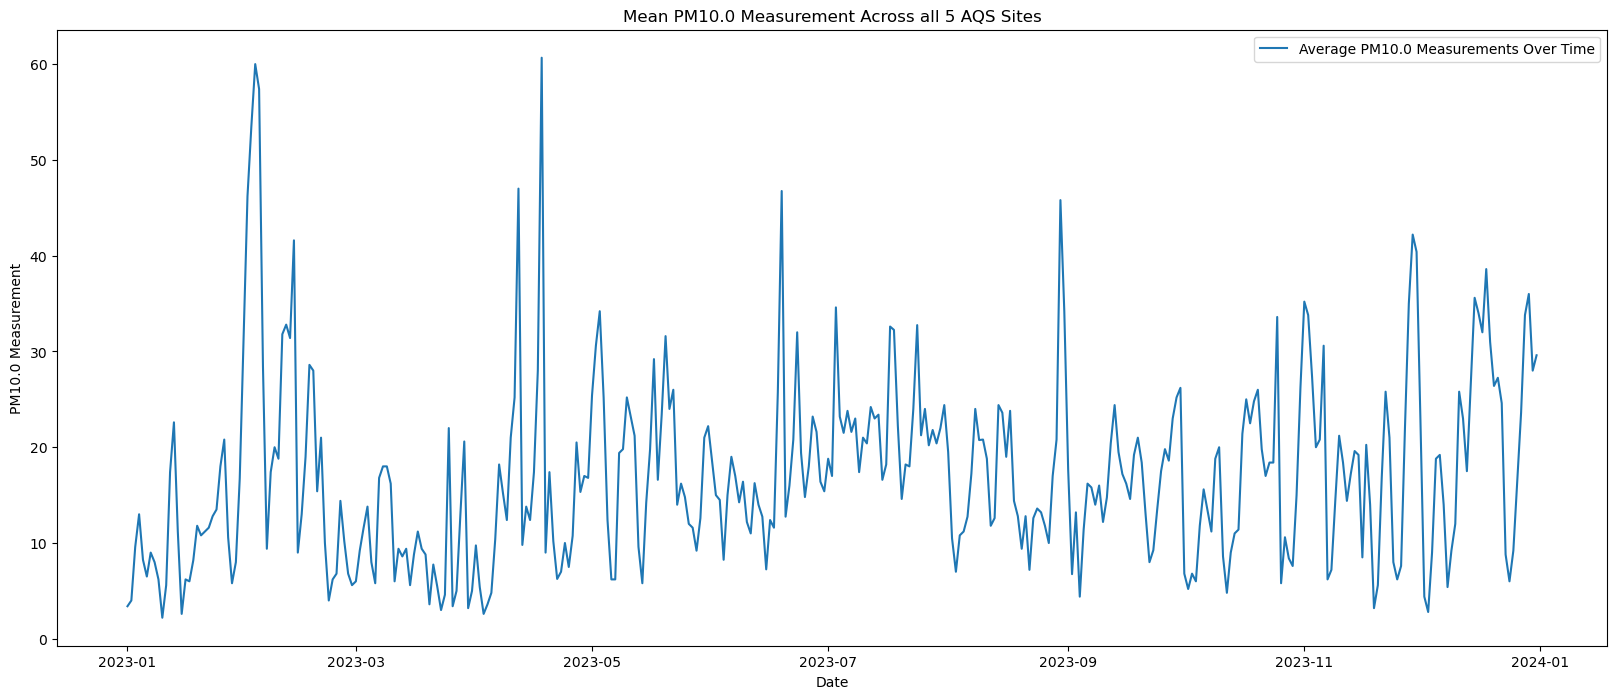

In [34]:
# convert to datetime format
all_slc_counties_2023_pm10['date_local'] = pd.to_datetime(all_slc_counties_2023_pm10['date_local'])

# aggregate data by taking the mean sample measurement for each date
all_sensor_midnight_avg = all_slc_counties_2023_pm10.groupby('date_local')['sample_measurement'].mean().reset_index()

# Plot aggregated data
plt.figure(figsize=(20, 8))
plt.plot(all_sensor_midnight_avg['date_local'], all_sensor_midnight_avg['sample_measurement'], label='Average PM10.0 Measurements Over Time')

plt.xlabel('Date')
plt.ylabel('PM10.0 Measurement')
plt.title('Mean PM10.0 Measurement Across all 5 AQS Sites')
plt.legend()
plt.show()